# Default Model Example

In [19]:
from epimodel.preprocessing.data_preprocessor import preprocess_data
from epimodel.pymc3_models.models import DefaultModel
from epimodel.pymc3_models.epi_params import EpidemiologicalParameters, bootstrapped_negbinom_values
import pymc3 as pm

## Load Data

In [16]:
data = preprocess_data('../notebooks/double-entry-data/double_entry_final.csv')

Dropping NPI Travel Screen/Quarantine
Dropping NPI Travel Bans
Dropping NPI Public Transport Limited
Dropping NPI Internal Movement Limited
Dropping NPI Public Information Campaigns
Dropping NPI Symptomatic Testing
Masking invalid values


## Create custom infection to fatality delay using default generation interval

In [21]:
example_symptom_to_fatality_delay = {
                'mean_mean': 18,
                'mean_sd': 1,
                'disp_mean': 10,
                'disp_sd': 3,
                'source': 'made up',
                'dist': 'negbinom',
                'notes': 'For example purposes only'
            }


In [22]:
ep = EpidemiologicalParameters()

In [23]:
infection_to_fatality_delay = bootstrapped_negbinom_values([ep.generation_interval,
                                                            example_symptom_to_fatality_delay])

100%|██████████| 250/250 [06:00<00:00,  1.44s/it]


In [25]:
ep.infection_to_fatality_delay = infection_to_fatality_delay

## Initialise model with epidemiological parameters

In [28]:
with DefaultModel(data) as model:
    model.build_model(**ep.get_model_build_dict())


## Run model

The notebook features a small number of samples to make documentation compilation proceed quickly. For a serious run, use at least 1000 samples and 500 tuning steps.

In [6]:
with model.model:
    model.trace = pm.sample(50, tune=50, cores=4, chains=4, max_treedepth=12)

Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [DeathsDelayDisp, DeathsDelayMean, InitialSizeDeaths_log, CasesDelayDisp, CasesDelayMean, InitialSizeCases_log, PsiDeaths, PsiCases, GrowthDeathsNoise, GrowthCasesNoise, GI_sd, GI_mean, RegionLogR_noise, HyperRVar, CM_Alpha]


Sampling 4 chains for 50 tune and 50 draw iterations (200 + 200 draws total) took 58 seconds.
/home/davidj/.cache/pypoetry/virtualenvs/epimodel-2aoiW435-py3.8/lib/python3.8/site-packages/pymc3/sampling.py:628: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn(
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


## Plot results

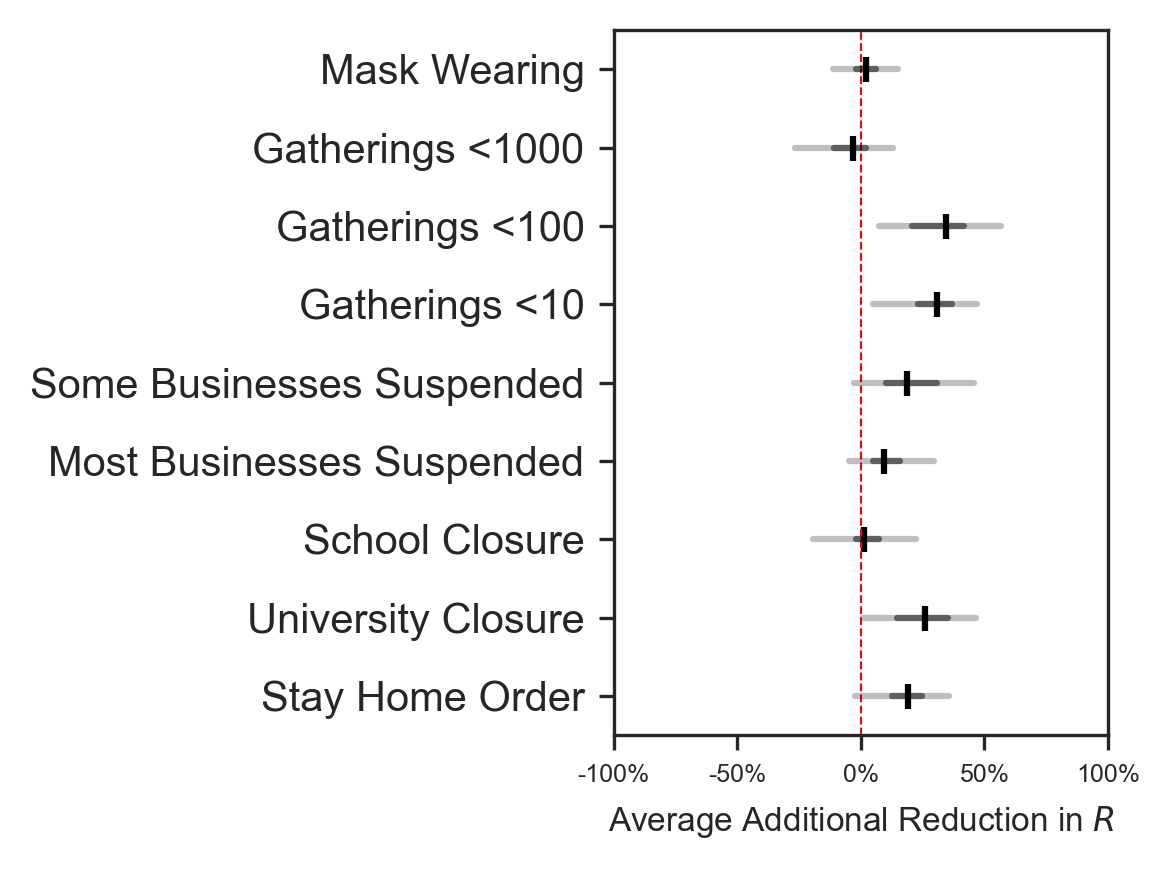

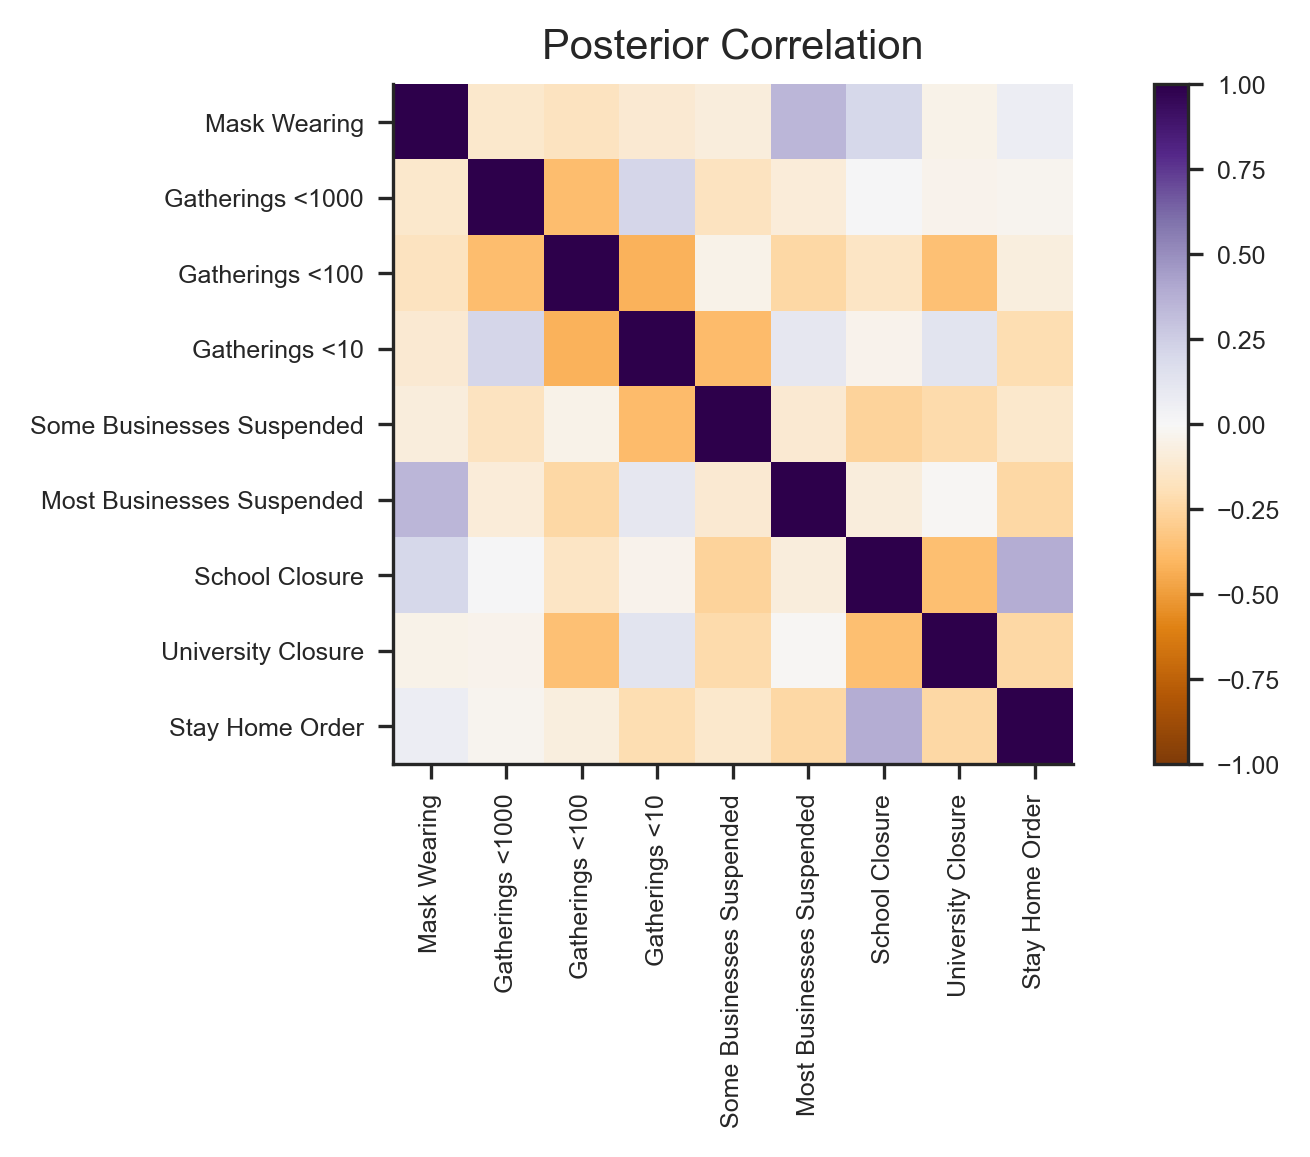

In [7]:
model.plot_effect()